# Майнор "Прикладные задачи анализа данных"
## Домашнее задание 2 [10 баллов] до 23:59 22.03.2018. Предсказание цены акции по экономическим новостям


В этом домашнем задании вы попытаетесь предсказать рост цены акции компании Газпром по новостям о компании. Домашнее задание состоит из трех частей:
1. Предварительная обработка текстов и эксплоративный анализ
2. Baseline алгоритм
3. Творческая часть

Все три части можно считать независимыми – вы можете сделать одну или две из них, однако мы настоятельно советуем выполнить все три. Все инструкции по выполнению домашнего задания – ниже. 



Входные данные:
* Новости о компании "Газпром", начиная с 2010 года
* Стоимость акций компании "Газпром" на ММВБ, начиная с 2010 года
    * цена открытия (Open)
    * цена закрытия (ClosingPrice)
    * максимальная цена за день (DailyHigh)
    * минимальная цена за день (DailyLow) 
    * объем бумаг (VolumePcs)


## Выполняли: Шеин Кирилл, Георгий Фесенко ИАД3

## Часть 1. Вводная [3 балла]

Проведите предобработку текстов: если считаете нужным, выполните токенизацию, приведение к нижнему регистру, лемматизацию и/или стемминг. Ответьте на следующие вопросы:
* Есть ли корреляция между средней длинной текста за день и ценой закрытия?
* Есть ли корреляция между количеством упоминаний Алексея Миллера  и ценой закрытия? Учтите разные варианты написания имени.
* Упоминаний какого газопровода в статьях больше: 
    * "северный поток"
    * "турецкий поток"?
* Кого упоминают чаще:
    * Алексея Миллера
    * Владимира Путина?
* О каких санкциях пишут в статьях?

In [1]:
import pandas as pd
df = pd.read_csv('C:\\Users\ML\\texts.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending=True)

pr_all = pd.read_csv('C:\\Users\ML\\gazprom_prices.csv', sep=';')
pr_all = pr_all.rename(index=str, columns={'Date':'date'})
pr_all['date'] = pd.to_datetime(pr_all['date'])
pr_all = pr_all.sort_values('date', ascending=True)

In [3]:
result = pd.merge(pr_all, df, on='date')
result.head()

,date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs,text
0,2010-01-02,184.74,189.85,190.40,183.50,76298175,"""Газпром"" не исключает в 2010 г. выпуска обли..."
1,2010-01-19,190.10,189.76,190.47,187.36,48626727,"""Газпром"" готов забирать весь объем азербайдж..."
2,2010-01-28,183.75,182.30,185.98,181.67,62561241,"Консорциум во главе с российским ОАО ""Газпром..."
3,2010-02-07,144.80,148.25,148.27,144.05,41766629,Газпромбанк открыл на Кипре дочернюю компанию...
4,2010-02-09,161.79,162.80,163.57,161.53,42721026,"""Газпром"" вновь понизил прогноз экспорта в Ев..."


In [6]:
#Приводим текст к нижнему регистру и пытаемся убрать знаки пунктуации
import nltk
import re
from nltk.tokenize import word_tokenize
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
from nltk.corpus import stopwords
text = result['text']
text_1 = []
prog = re.compile('[А-Яа-я\-]+')
delete = re.compile(u'\W+?')
for i in text:
    l1 = prog.findall(str(i).lower())
    tex = re.sub('\W+?'," ",str(l1))
    text_1.append(str(tex))
    

In [7]:
#Я немного не понял, что значит средняя длин текста за день, ведь у нас в один день - один текст, так что взял длину текста.
text = result['text']
len_text = []
for tx in text_1:
    token = word_tokenize(tx)
    len_text.append(len(token))


In [8]:
#Округлил цену развития до двух знаков после запятой
res = result['ClosingPrice']
close = []
for i in res:
    close.append(round(int(i),1))


Text(0,0.5,'Цена закрытия')

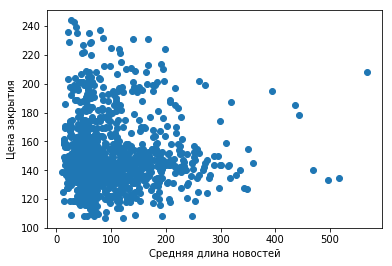

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(len_text,close)
plt.xlabel('Средняя длина новостей')
plt.ylabel('Цена закрытия')

**Мы не увиделеи тут какой-либо корреляции так как на малых длиннах текста у нас цена закрытия во всем его диапозоне, а при больших есть как высокая, так и низкая цена закрытия**

In [42]:
text_1[5]

'  европейская    комиссия    довольна    итогами    российско польских    переговоров    в    газовой    сфере    которые    ранее    вызывали    у    нее    вопросы    сообщил    во    вторник    газпром    по    итогам    встречи    главы    компании    алексея    миллера    и    еврокомиссара    по    энергетике    гюнтера    эттингера    в    рамках    беседы    гюнтер    эттингер    от    имени    европейской    комиссии    выразил    удовлетворение    ходом    и    итогами    российско польских    переговоров    о    сотрудничестве    в    газовой    сфере         указано    в    сообщении  '

In [26]:
num = []
for i in range(len(text_1)):
    token = nltk.word_tokenize(str(text_1[i]))
    for j in token:
        if j == 'миллер' or j == 'миллера':
            num.append(i)

In [22]:
'''
Сформируем словарь из полученного списка, где у нас есть индекс дня когда был упомянут Миллер, и сколькраз
он был упомянут в тексте
'''
counter = {}
for elem in num:
    counter[elem] = counter.get(elem, 0) + 1

doubles = {element: count for element, count in counter.items()}

print(doubles)

{1: 2, 5: 1, 11: 1, 29: 1, 51: 2, 56: 1, 61: 1, 83: 2, 84: 1, 122: 1, 125: 1, 127: 3, 131: 1, 141: 1, 170: 2, 171: 1, 176: 1, 190: 1, 191: 1, 201: 3, 209: 1, 216: 2, 224: 2, 254: 5, 274: 1, 276: 2, 283: 4, 287: 1, 288: 1, 292: 6, 298: 2, 311: 1, 324: 1, 325: 1, 338: 1, 346: 2, 351: 2, 362: 1, 368: 1, 375: 1, 426: 1, 430: 3, 431: 2, 435: 1, 439: 3, 446: 1, 456: 1, 481: 1, 501: 1, 508: 1, 538: 2, 539: 1, 542: 1, 546: 2, 559: 1, 576: 1, 579: 1, 582: 1, 586: 1, 625: 3, 640: 3, 668: 1, 669: 1, 672: 1, 682: 1, 685: 1, 700: 1, 708: 1, 727: 1, 742: 1, 745: 1, 754: 1, 774: 2, 779: 1, 787: 1, 798: 1, 799: 1, 814: 4, 843: 1, 844: 1, 846: 1, 847: 1, 887: 1, 890: 1, 905: 1, 906: 1, 919: 1, 926: 1, 947: 2, 962: 1, 975: 3, 977: 1, 1012: 1, 1043: 1, 1094: 1, 1102: 1, 1113: 2}


In [39]:
#Запишем значения в списки
num_close = []
freq_mil = []
for key, value in doubles.items():
    num_close.append(res[key])
    freq_mil.append(value)

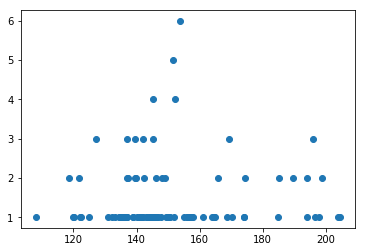

In [40]:
plt.scatter(num_close,freq_mil)

**Тут тоже не видно четко выраженной корреляции,тк при упоминание Миллера 1 раз, у нас цена закрытия изменяется в широком диапазоне.**


In [28]:
morph = pymorphy2.MorphAnalyzer()
from nltk.corpus import stopwords
token_bg_text = []
for i in text_1:
    token = nltk.word_tokenize(i)
    token_bg_text += nltk.bigrams(morph.parse(j)[0].normal_form for j in token if j not in  stopwords.words('russian'))
token_bg_text

[('газпром', 'исключать'),
 ('исключать', 'год'),
 ('год', 'выпуск'),
 ('выпуск', 'облигация'),
 ('облигация', 'примерно'),
 ('примерно', 'половина'),
 ('половина', 'общий'),
 ('общий', 'объём'),
 ('объём', 'заимствование'),
 ('заимствование', 'планироваться'),
 ('планироваться', 'текущий'),
 ('текущий', 'год'),
 ('год', 'сообщить'),
 ('сообщить', 'телефонный'),
 ('телефонный', 'конференция'),
 ('конференция', 'понедельник'),
 ('понедельник', 'начальник'),
 ('начальник', 'управление'),
 ('управление', 'работа'),
 ('работа', 'финансовый'),
 ('финансовый', 'рынок'),
 ('рынок', 'холдинг'),
 ('холдинг', 'пётр'),
 ('пётр', 'бакаев'),
 ('газпром', 'готовый'),
 ('готовый', 'забирать'),
 ('забирать', 'весь'),
 ('весь', 'объесть'),
 ('объесть', 'азербайджанский'),
 ('азербайджанский', 'газа'),
 ('газа', 'баку'),
 ('баку', 'готовый'),
 ('готовый', 'поставить'),
 ('поставить', 'заявить'),
 ('заявить', 'вторник'),
 ('вторник', 'глава'),
 ('глава', 'газпром'),
 ('газпром', 'алексей'),
 ('алексей', 

In [29]:
freq_token = nltk.FreqDist(token_bg_text)
freq_token[('турецкий','поток')]

39

In [30]:
freq_token = nltk.FreqDist(token_bg_text)
freq_token[('северный','поток')]

15

**Мы можем заметить, что Турецкий поток упоминается чаще, чем северный** 

In [31]:
freq_token[('владимир','путин')]

65

In [32]:
freq_token[('алексей','миллер')]

122

### Мы выидим, что Алексей Миллер упоминается в текстах чаще, чем Владимир Путин, однако для чистоты эксперимента , мы решили попробовать и другие биграммы , которыми мог быть описан президент

In [33]:
freq_token[('президент','путин')]

0

In [34]:
freq_token[('вв','путин')]

0

In [35]:
freq_token[('володя','путин')]

0

In [36]:
freq_token[('царь','батюшка')]

0

### Как мы видим другие словосочетания не дали результата

In [37]:
sanction = []
for san in token_bg_text:
    if san[0] == 'санкция':
        bg_2 = morph.parse(san[1])[0]
        if (bg_2.tag.POS) == 'ADJF' or (bg_2.tag.POS) == 'ADJS' or (bg_2.tag.POS) == 'NOUN': 
            sanction.append(bg_2[0])
    elif san[1] == 'санкция':
        bg_1 = morph.parse(san[0])[0]
        if (bg_1.tag.POS) == 'ADJF' or (bg_1.tag.POS) == 'ADJS' or (bg_1.tag.POS) == 'NOUN': 
            sanction.append(bg_1[0])

In [38]:
print(list(set(sanction)))

['эксперт', 'компания', 'россия', 'западный', 'секторальный', 'нефть', 'волна', 'мнение', 'падение', 'американский', 'предоставление', 'иностранец', 'несогласованный', 'условие', 'персональный', 'развитие', 'антироссийский', 'репутационный', 'мочь', 'сторона', 'проблема', 'последствие', 'запрет', 'рнкб', 'отношение', 'готовый', 'экономический', 'число', 'территория', 'перевод', 'партнёр', 'работа', 'сша', 'очередной', 'эффект', 'газпром', 'один', 'ситуация', 'сила', 'монополия', 'влияние', 'финансовый', 'крым', 'международный', 'который', 'технологический', 'штрафной', 'виток', 'куб', 'банка', 'нарушение', 'риска', 'ес', 'список', 'введение']


**Я решил искать не только по прилагательным как изначально хотел , но и по существительным, так как мне было очевидно, что скорей всего в тексте будет что-то вроде** :**Санкции США или Нато** и мои догадки оправдались.

**Из важных существительных мы можем выделить:**США,ЕС,список,Россия,банка,газпром.

**Из прилагательных можно выделить:***Экономические , финаносвые, американские, международные , западные,штрафные,секторашльные***

## Часть 2. Классификационная [3 балла]
Вам предстоит решить следующую задачу: по текстам новостей за день определить, вырастет или понизится цена закрытия.
Для этого:
* бинаризуйте признак "цена закрытия":  новый признак ClosingPrice_bin равен 1, если по сравнению со вчера цена не упала, и 0 – в обратном случаея;
* составьте бучающее и тестовое множество: данные до начала 2016 года используются для обучения, данные с 2016 года и позже – для тестирования.

Таким образом, в каждлый момент времени мы знаем: 
* ClosingPrice_bin – бинарый целевой признак
* слова из статей, опубликованных в этот день – объясняющие признаки

В этой части задания вам нужно сделать baseline алгоритм и попытаться его улучшить в следующей части. 

Используйте любой известный вам алгоритм классификации текстов для того, Используйте $tf-idf$ преобразование, сингулярное разложение, нормировку признакого пространства и любые другие техники обработки данных, которые вы считаете нужным. Используйте accuracy и F-measure для оценки качества классификации. Покажите, как  $tf-idf$ преобразование или сингулярное разложение или любая другая использованная вами техника влияет на качество классификации.
Если у выбранного вами алгоритма есть гиперпараметры (например, $\alpha$ в преобразовании Лапласа для метода наивного Байеса), покажите, как изменение гиперпараметра влияет на качество классификации.

In [169]:
import pandas as pd
df = pd.read_csv('texts.csv')
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values('date', ascending=False)

pr_all = pd.read_csv('gazprom_prices.csv', sep=';')
pr_all = pr_all.rename(index=str, columns={'Date':'date'})
pr_all['date'] = pd.to_datetime(pr_all['date'])
pr_all = pr_all.sort_values('date', ascending=False)

result = pd.merge(pr_all, df, on='date')
result.dropna(axis=0, how='any')
result['ClosingPrice_bin'] = (result['Open'] <= result['ClosingPrice']).apply(int)

df_full = result[['date', 'text', 'ClosingPrice_bin']]

yearToSplitBy = pd.datetime(2016, 1, 1)
train = df_full[df_full.date < yearToSplitBy]
test = df_full[df_full.date >= yearToSplitBy]

In [170]:
from sklearn import feature_extraction
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline

X_train = train.text
y_train = train.ClosingPrice_bin
X_test = test.text
y_test = test.ClosingPrice_bin
##tf-idf
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 3))
vectorizer.fit(df_full.text)
X_train = vectorizer.transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()
##normalization
X_train_norm = (X_train - X_train.mean()) / (X_train.max() - X_train.min())
X_test_norm = (X_test - X_test.mean()) / (X_test.max() - X_test.min())

In [171]:
accuracy = []
f_measure = []
max_depths = [3, 5, 10, 15, 20]
for max_depth in max_depths:
    clf = RandomForestClassifier(n_estimators=100, max_depth=max_depth)
    clf.fit(X_train_norm, y_train)
    
    pred = clf.predict(X_test_norm)
    accuracy.append(accuracy_score(y_test, pred))
    f_measure.append(f1_score(y_test, pred))

На графиках видно, что при маленькой глубине получается не очень хорошо - алрогитм становится бессмысленным(малая f-score)  
Баланс достигается про глубине в 15. Теперь попробуем поменять количество деревьев.

Text(0.5,0,'max_depth')

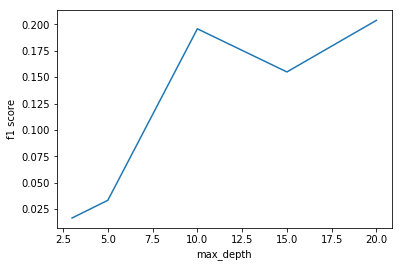

In [172]:
plt.plot(max_depths, f_measure)
plt.ylabel('f1 score')
plt.xlabel('max_depth')

Text(0.5,0,'max_depth')

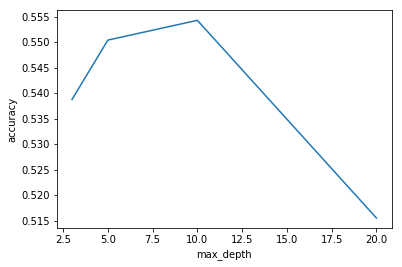

In [173]:
plt.plot(max_depths, accuracy)
plt.ylabel('accuracy')
plt.xlabel('max_depth')

In [174]:
accuracy = []
f_measure = []
n_estimators = [100, 200, 500, 1000, 1200]
for n in n_estimators:
    clf = RandomForestClassifier(n_estimators=n, max_depth=15)
    clf.fit(X_train_norm, y_train)
    
    pred = clf.predict(X_test_norm)
    accuracy.append(accuracy_score(y_test, pred))
    f_measure.append(f1_score(y_test, pred))

Тут картина совсем понятна, и f-measure и accuracy лучшие при 500 деревьях.

Text(0.5,0,'n_estimators')

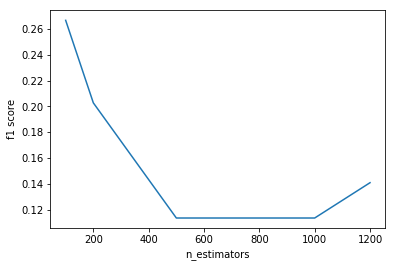

In [175]:
plt.plot(n_estimators, f_measure)
plt.ylabel('f1 score')
plt.xlabel('n_estimators')

Text(0.5,0,'n_estimators')

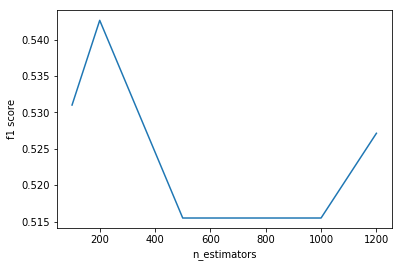

In [176]:
plt.plot(n_estimators, accuracy)
plt.ylabel('f1 score')
plt.xlabel('n_estimators')

# Итог  
Нормализовали данные, использовали tf-idf и получили следующие значение точности и f меры при количестве деревьев 500 и их глубине 15.

In [177]:
print("Accuracy:", accuracy[2])
print("F1-score:", f_measure[2])

Accuracy: 0.515503875969
F1-score: 0.113475177305


## Часть 3. Творческая [4 балла]
Придумайте и попытайтесь сделать еще что-нибудь, чтобы улучшить качество классификации. 
Направления развития:
* Морфологический признаки: 
    * использовать в качестве признаков только существительные или только именованные сущности;
* Модели скрытых тем:
    * использовать в качестве признаков скрытые темы;
    * использовать в качестве признаков динамические скрытые темы 
    пример тут: (https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/dtm_example.ipynb)
* Синтаксические признаки:
    * использовать SOV-тройки в качестве признаков
    * кластеризовать SOV-тройки по усредненным эмбеддингам  (обученные word2vec модели можно скачать отсюда: (http://rusvectores.org/ru/models/ или https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md) и использовать только центроиды кластеров в качестве признаков
* что-нибудь еще     

In [178]:
import nltk
import re
from nltk.tokenize import word_tokenize
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
from nltk.corpus import stopwords

text = df_full['text']
text_1 = []
prog = re.compile('[А-Яа-я\-]+')
delete = re.compile(u'\W+?')
for i in range(len(text)):
    l1 = prog.findall(text[i].lower())
    tex = re.sub('\W+?'," ",str(l1))
    text_1.append(str(tex))

In [179]:
token_morp_text = []
for i in text_1:
    token = nltk.word_tokenize(i)
    token_morp_text.append([morph.parse(j)[0].normal_form for j in token if j not in  stopwords.words('russian')])

In [180]:
word_noun= []
for part in token_morp_text:
    bubble = []
    for word in part:
        word = morph.parse(word)[0]
        if (word.tag.POS) == 'NOUN':
            bubble.append(word[0])
    word_noun.append(bubble)

In [181]:
new_word_noun = []
for j in range(len(word_noun)):
    s = ""
    for word in word_noun[j]:
        s += word + " "
    new_word_noun.append(s)

In [182]:
X = pd.Series(new_word_noun)
y = df_full['ClosingPrice_bin']

In [183]:
vect = feature_extraction.text.TfidfVectorizer()
vect.fit(new_word_noun)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [184]:
X_tfidf = vect.transform(X)

In [185]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf.toarray(), y, test_size=0.3, random_state=42)

F measure получилась больше, что, в общем-то, хорошо, но точность заметно уменьшилась. Учитывая размеры выборки, могло произойти вообще все что угодно.

In [186]:
clf = RandomForestClassifier(n_estimators=500, max_depth=15)
clf.fit(X_train, y_train)

print("Accuracy:", accuracy_score(y_test, clf.predict(X_test)))
print("F1 score:", f1_score(y_test, clf.predict(X_test)))

Accuracy: 0.465517241379
F1 score: 0.176991150442


## Сдача домашнего задания

Дедлайн сдачи домашнего задания:  23:59 22.03.2018. Каждый день просрочки дедлайна штрафуется -1 баллом.

Результаты домашнего задания должны быть оформлены в виде отчета в jupyter notebook.
Нормальный отчёт должен включать в себя:
* Краткую постановку задачи и формулировку задания
* Описание минимума необходимой теории и/или описание используемых инструментов 
* Подробный пошаговый рассказ о проделанной работе
* **Аккуратно** оформленные результаты
* Подробные и внятные ответы на все заданные вопросы 
* Внятные выводы – не стоит относится к домашнему заданию как к последовательности сугубо технических шагов, а стоит относится скорее как к небольшому практическому исследованию, у которого есть своя цель и свое назначение.

Задание выполняется в группе до трех человек. Не забудьте перечислить фамилии всех, кто работал над домашнем задании, в jupyter notebook.  

В случае использования какого-либо строннего источника информации обязательно дайте на него ссылку (поскольку другие тоже могут на него наткнуться). Плагиат наказывается нулём баллов за задание и предвзятым отношением в будущем.


При возникновении проблем с выполнением задания обращайтесь с вопросами к преподавателю по семинарским занятиям в вашей группе или у учебным ассистентам.

Учебный ассистент по ДЗ 2: Таисия Глушкова (email: glushkovato@gmail.com, telegram: @glushkovato).


Небрежное оформление отчета существенно отразится на итоговой оценке. Весь код из отчёта должен быть воспроизводимым, если для этого нужны какие-то дополнительные действия, установленные модули и т.п. — всё это должно быть прописано в отчете в явном виде.

Сдача отчетов осуществляется через систему AnyTask.

